In [ ]:
#Install any packages you need
! pip install pandas
! pip install matplotlib
! pip install statsmodels
! pip install numpy

In [1]:
import pandas as pd

data = pd.read_csv('Data.csv')
#These are the values most likely to change
independents = ['gmat', 'gpa', 'work experience']
dependent = 'admitted'

for i in data.columns:
    data[i] = pd.to_numeric(data[i], errors='coerce')
data = data.dropna()
data.head()

,gmat,gpa,work experience,admitted
0,580,2.7,4,0
1,660,3.3,6,1
2,740,3.3,5,1
3,590,1.7,4,0
4,660,4.0,4,1


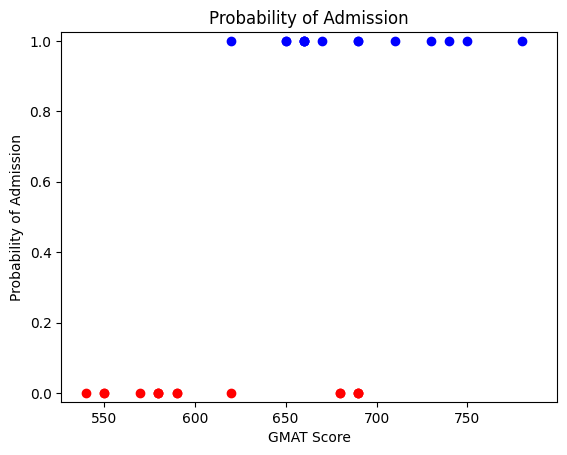

In [2]:
from matplotlib import pyplot as plt

def plotting(x):
    #These are the values most likely to change
    plt.title("Probability of Admission")
    plt.xlabel("GMAT Score")
    plt.ylabel("Probability of Admission")

    plt.xlim(min(x)*0.975, max(x)*1.025)
    plt.ylim(-0.025, 1.025)

def testingScatters(testingIndependent):
    dependentFalse = data[data[dependent] == 0]
    dependentTrue = data[data[dependent] == 1]

    plt.scatter(dependentFalse[testingIndependent], dependentFalse[dependent], color='red')
    plt.scatter(dependentTrue[testingIndependent], dependentTrue[dependent], color='blue')

testingScatters(independents[0])
plotting(data[independents[0]])

In [44]:
trainingData = data.iloc[0::]
testingingData = data.iloc[0::]

trainingData.head(), testingingData.head()

(   gmat  gpa  work experience  admitted
 0   580  2.7                4         0
 1   660  3.3                6         1
 2   740  3.3                5         1
 3   590  1.7                4         0
 4   660  4.0                4         1,
    gmat  gpa  work experience  admitted
 0   580  2.7                4         0
 1   660  3.3                6         1
 2   740  3.3                5         1
 3   590  1.7                4         0
 4   660  4.0                4         1)

In [52]:
from sklearn.ensemble import RandomForestClassifier

forestPopulation = 1000

testingModel = RandomForestClassifier(n_estimators=forestPopulation)
testingModel.fit(trainingData[[independents[0]]], trainingData[dependent])

model = RandomForestClassifier(n_estimators=forestPopulation)
model.fit(trainingData[independents], trainingData[dependent])
model.score(testingingData[independents], testingingData[dependent])

0.9333333333333333

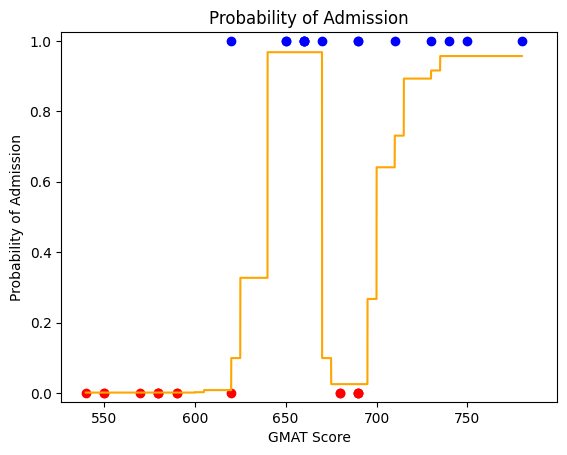

In [53]:
import numpy as np

visualisationValues = np.arange(min(data[independents[0]]), max(data[independents[0]]), 0.01)
frame = pd.DataFrame({independents[0]: visualisationValues})
prediction = [i[1] for i in testingModel.predict_proba(frame[[independents[0]]])]

plt.plot(visualisationValues, prediction, color='orange')

testingScatters(independents[0])
plotting(data[independents[0]])

In [54]:
predictionValues = [[400, 4, 4],
                    [600, 3, 5]]
predictionFrame = pd.DataFrame()

for i, v in enumerate(predictionValues[0]):
    predictionFrame[independents[i]] = [x[i] for x in predictionValues]

prediction = model.predict_proba(predictionFrame)
predictionFrame[f"Predicted {dependent} probability"] = [x[1] for x in prediction]
predictionFrame

,gmat,gpa,work experience,Predicted admitted probability
0,400,4,4,0.552
1,600,3,5,0.378
